# Mini Project template

Name: 


## Install Dependencies

Java & Spark

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz

# Alternatives if the first link is too long:
# !wget -q http://archive.apache.org/dist/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz
# !wget -q http://apache.osuosl.org/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz

!tar xf spark-3.4.1-bin-hadoop3.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.1-bin-hadoop3"

In [ ]:

import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = (
    SparkSession
      .builder
      .appName("CollabApp")
      .master("local[*]")
      .config('spark.ui.port', '4050')
      .config("spark.dynamicAllocation.enabled", "false")
      .config("spark.sql.adaptive.enabled", "false")
      .enableHiveSupport() 
      .getOrCreate()
)
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)

sc = spark.sparkContext

spark

In [1]:
import os
os.environ["SPARK_HOME"] = "/Users/tequan/Desktop/Cours ISEN/Hadoop & Spark/spark"

import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = (    
         SparkSession      
            .builder      
            .appName("TeQuanApp")      
            .master("local[*]")      
            .config('spark.ui.port', '4050')      
            .config("spark.dynamicAllocation.enabled", "false")      
            .config("spark.sql.adaptive.enabled", "false")      
            .enableHiveSupport() # Enable Hive support      
            .getOrCreate()
)

spark.conf.set("spark.sql.repl.eagerEval.enabled", True)
sc = spark.sparkContext
spark

23/10/25 15:47:57 WARN Utils: Your hostname, Yains-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 172.20.10.6 instead (on interface en0)
23/10/25 15:47:57 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/25 15:47:58 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Python:

In [2]:
from pyspark.sql.functions import *
from pyspark.sql.types import *
import math
import re

NGROK: Set your authtoken instead of `AuthCode` :

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok authtoken HERE') # <- change here
get_ipython().system_raw('./ngrok http 4050 &')

Get the url and open the site:

In [ ]:
!curl -s http://localhost:4040/api/tunnels | grep -Po 'public_url":"(?=https)\K[^"]*'

Kaggle:

In [ ]:
! pip install -q kaggle

Upload your kaggle.json file with your token here:

In [ ]:
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

# Work

Let us start our project 

In [27]:
!kaggle datasets list | grep -i "marvel"

**My project will be to make a Exploratory Data Analysis to find out which of DCEU or Marvel makes the best Super hero movies**

Will we start by downloading the datasets from Kaggle

Honestly I'm more of a DC Fan 

![Sample Image](https://www.micromania.fr/on/demandware.static/-/Sites-Micromania-Library/default/dwc2760e97/fanzone/dossier/marvel-vs-dc/marvel-vs-dc_Header.jpg)


In [16]:
!kaggle datasets download -d rachit239/mcu-complete-dataset
!kaggle datasets download -d kagankoral/dceu-box-office-and-rating-dataset

  0%|                                               | 0.00/2.25k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 2.25k/2.25k [00:00<00:00, 7.62MB/s]
  0%|                                                 | 0.00/889 [00:00<?, ?B/s]
100%|██████████████████████████████████████████| 889/889 [00:00<00:00, 3.17MB/s]


In [17]:
#Unzip both datasets
!unzip mcu-complete-dataset.zip -d project-data
!unzip dceu-box-office-and-rating-dataset.zip -d project-data

Archive:  mcu-complete-dataset.zip
  inflating: project-data/mcu dataset.csv  
Archive:  dceu-box-office-and-rating-dataset.zip
  inflating: project-data/dceu_box_office_and_rating.csv  


I will first read the datasets to have a view of the data and decide on which schema to implement

In [3]:
dceu = spark.read.option("header","true").csv('project-data/dceu_box_office_and_rating.csv')
mcu = spark.read.option("header","true").csv('project-data/mcu dataset.csv')

In [4]:
dceu.show()

+--------------------+-----------------+---------------+----------+------------+-------------------+----+---------+-----------+--------------+
|         movie_title|     release_date|duration (mins)|budget ($)|US_gross ($)|worldwide_gross ($)|imdb|metascore|tomatometer|audience_score|
+--------------------+-----------------+---------------+----------+------------+-------------------+----+---------+-----------+--------------+
|        Man of Steel|    June 14, 2013|            143| 225000000|   291045518|          668045518| 7.1|       55|         56|            75|
|Batman v Superman...|   March 25, 2016|            152| 250000000|   330360194|          873637528| 6.4|       44|         29|            63|
|       Suicide Squad|   August 5, 2016|            123| 175000000|   325100054|          746846894| 5.9|       40|         26|            58|
|        Wonder Woman|     June 2, 2017|            141| 149000000|   412845172|          822854286| 7.4|       76|         93|            83|

In [5]:
mcu.show()

+--------------------+-----------------+--------------------+--------------------+--------+--------------------+-----------+---------+--------------------+------------+--------------+--------------+-------------+----------------+---------+-----+
|                Name|  US release Date|            Director|            Producer|Duration|               Genre|IMDB rating|metascore|                Cast|      Budget|Domestic Gross|   Total Gross|Opening Gross|Oscar Nomination|Oscar won|Phase|
+--------------------+-----------------+--------------------+--------------------+--------+--------------------+-----------+---------+--------------------+------------+--------------+--------------+-------------+----------------+---------+-----+
|            Iron Man|      May 2, 2008|         Jon Favreau|Avi Arad and Kevi...| 2h 6min|Action , Adventur...|        7.9|       79|Robert Downey Jr....|$140,000,000|  $318,604,126|  $585,366,247|  $98,618,668|               2|        0|    1|
| The incredible

I will then get a glimpse of the default schema to see which data types to change

In [6]:
dceu.printSchema()
mcu.printSchema()

root
 |-- movie_title: string (nullable = true)
 |-- release_date: string (nullable = true)
 |-- duration (mins): string (nullable = true)
 |-- budget ($): string (nullable = true)
 |-- US_gross ($): string (nullable = true)
 |-- worldwide_gross ($): string (nullable = true)
 |-- imdb: string (nullable = true)
 |-- metascore: string (nullable = true)
 |-- tomatometer: string (nullable = true)
 |-- audience_score: string (nullable = true)

root
 |-- Name: string (nullable = true)
 |-- US release Date: string (nullable = true)
 |-- Director: string (nullable = true)
 |-- Producer: string (nullable = true)
 |-- Duration: string (nullable = true)
 |-- Genre: string (nullable = true)
 |-- IMDB rating: string (nullable = true)
 |-- metascore: string (nullable = true)
 |-- Cast: string (nullable = true)
 |-- Budget: string (nullable = true)
 |-- Domestic Gross: string (nullable = true)
 |-- Total Gross: string (nullable = true)
 |-- Opening Gross: string (nullable = true)
 |-- Oscar Nominatio

I will declare the schema for both datasets manually. 

**!!!!Remark** : Some columns contain mixed data types(budget with the $ symbol) and the date column is written as a string. We will declare the schema for clean columns and the manually  cast the desired data types to the columns that need to be cleaned first

In [8]:
dceuschema = StructType(
    [
        StructField('movie_title',   StringType(),  True),
        StructField('release_date', StringType(),  True),
        StructField('duration (mins)',   IntegerType(), True),
        StructField('budget ($)', FloatType(), True),
        StructField('US_gross ($)',       FloatType(),  True),
        StructField('worldwide_gross ($)',      FloatType(),  True),
        StructField('imdb',      DoubleType(),  True),
        StructField('metascore',     IntegerType(),  True),
        StructField('tomatometer',      IntegerType(),  True),
        StructField('audience_score',      IntegerType(),  True)
    ]
)

dceu = spark.read.option("header","true").schema(dceuschema).csv('project-data/dceu_box_office_and_rating.csv')
dceu.printSchema()

root
 |-- movie_title: string (nullable = true)
 |-- release_date: string (nullable = true)
 |-- duration (mins): integer (nullable = true)
 |-- budget ($): float (nullable = true)
 |-- US_gross ($): float (nullable = true)
 |-- worldwide_gross ($): float (nullable = true)
 |-- imdb: double (nullable = true)
 |-- metascore: integer (nullable = true)
 |-- tomatometer: integer (nullable = true)
 |-- audience_score: integer (nullable = true)



In [9]:
mcuschema = StructType(
    [
        StructField('Name',   StringType(),  True),
        StructField('US release Date', StringType(),  True),
        StructField('Director',   StringType(), True),
        StructField('Producer', StringType(), True),
        StructField('Duration',       StringType(),  True),
        StructField('Genre',       StringType(),  True),
        StructField('IMDB rating',      DoubleType(),  True),
        StructField('metascore',      IntegerType(),  True),
        StructField('Cast',      StringType(),  True),
        StructField('Budget',      StringType(),  True),
        StructField('Domestic Gross',      StringType(),  True),
        StructField('Total Gross',      StringType(),  True),
        StructField('Opening Gross',      StringType(),  True),
        StructField('Oscar Nomination',      IntegerType(),  True),
        StructField('Oscar won',      IntegerType(),  True),
        StructField('Phase',     IntegerType(),  True)
    ]
)

mcu = spark.read.option("header", "true").schema(mcuschema).csv('project-data/mcu dataset.csv')
mcu.printSchema()

root
 |-- Name: string (nullable = true)
 |-- US release Date: string (nullable = true)
 |-- Director: string (nullable = true)
 |-- Producer: string (nullable = true)
 |-- Duration: string (nullable = true)
 |-- Genre: string (nullable = true)
 |-- IMDB rating: double (nullable = true)
 |-- metascore: integer (nullable = true)
 |-- Cast: string (nullable = true)
 |-- Budget: string (nullable = true)
 |-- Domestic Gross: string (nullable = true)
 |-- Total Gross: string (nullable = true)
 |-- Opening Gross: string (nullable = true)
 |-- Oscar Nomination: integer (nullable = true)
 |-- Oscar won: integer (nullable = true)
 |-- Phase: integer (nullable = true)



Let's start by converting the dates

In [10]:
dceu = dceu.withColumn("release_date", to_date(dceu["release_date"], "MMMM d, yyyy").cast(DateType()))
mcu = mcu.withColumn("US release Date", to_date(mcu["US release Date"], "MMMM d, yyyy").cast(DateType()))

#Now our schema is as needed for the dceu dataframe
dceu.printSchema()

root
 |-- movie_title: string (nullable = true)
 |-- release_date: timestamp (nullable = true)
 |-- duration (mins): integer (nullable = true)
 |-- budget ($): float (nullable = true)
 |-- US_gross ($): float (nullable = true)
 |-- worldwide_gross ($): float (nullable = true)
 |-- imdb: double (nullable = true)
 |-- metascore: integer (nullable = true)
 |-- tomatometer: integer (nullable = true)
 |-- audience_score: integer (nullable = true)



For the MCU dataframe, we will convert the duration column to an integer using a User-defined function(UDF) and the clean the budget and all money related columns

In [11]:
def duration_to_minutes(duration_str):
    
    match = re.search(r'(\d+)h ?(\d+)min', duration_str)
    if match:
        
        hours = int(match.group(1))
        minutes = int(match.group(2))
        total_minutes = hours * 60 + minutes
        return total_minutes
    else:
        
        return None

minutes_udf = udf(duration_to_minutes, IntegerType())
mcu = mcu.withColumn("Duration", minutes_udf(mcu["Duration"]))


In [12]:
column = ['Budget', 'Domestic Gross','Total Gross', 'Opening Gross']
for col in column:
    mcu = mcu.withColumn(col, regexp_replace(col, "[$,]", "").cast(FloatType()))
    
mcu.show()

+--------------------+-------------------+--------------------+--------------------+--------+--------------------+-----------+---------+--------------------+------+--------------+-----------+-------------+----------------+---------+-----+
|                Name|    US release Date|            Director|            Producer|Duration|               Genre|IMDB rating|metascore|                Cast|Budget|Domestic Gross|Total Gross|Opening Gross|Oscar Nomination|Oscar won|Phase|
+--------------------+-------------------+--------------------+--------------------+--------+--------------------+-----------+---------+--------------------+------+--------------+-----------+-------------+----------------+---------+-----+
|            Iron Man|2008-05-02 00:00:00|         Jon Favreau|Avi Arad and Kevi...|     126|Action , Adventur...|        7.9|       79|Robert Downey Jr....| 1.4E8|   3.1860413E8| 5.853663E8|   9.861867E7|               2|        0|    1|
| The incredible Hulk|2008-06-13 00:00:00|  

In [13]:
mcu.printSchema()

root
 |-- Name: string (nullable = true)
 |-- US release Date: timestamp (nullable = true)
 |-- Director: string (nullable = true)
 |-- Producer: string (nullable = true)
 |-- Duration: integer (nullable = true)
 |-- Genre: string (nullable = true)
 |-- IMDB rating: double (nullable = true)
 |-- metascore: integer (nullable = true)
 |-- Cast: string (nullable = true)
 |-- Budget: float (nullable = true)
 |-- Domestic Gross: float (nullable = true)
 |-- Total Gross: float (nullable = true)
 |-- Opening Gross: float (nullable = true)
 |-- Oscar Nomination: integer (nullable = true)
 |-- Oscar won: integer (nullable = true)
 |-- Phase: integer (nullable = true)



In [14]:
# We will rename columns to match both dataframes for join purpose

mcu = (
        mcu
                        .withColumnRenamed("Name", "Movie Title")
                        .withColumnRenamed("US release Date", "Released Date")
                        .withColumnRenamed("Duration", "Duration (mins)")
               ) 
dceu = (
        dceu
                .withColumnRenamed("movie_title", "Movie Title")
                .withColumnRenamed("release_date", "Released Date")
                .withColumnRenamed("duration (mins)", "Duration (mins)")
                .withColumnRenamed("budget ($)", "Budget")
                .withColumnRenamed("US_gross ($)", "Domestic Gross")
                .withColumnRenamed("worldwide_gross ($)", "Total Gross")
                .withColumnRenamed("imdb", "IMDB rating")
                .withColumnRenamed("audience_score", "Audience Score")
)
#add column for studio info 
mcu = mcu.withColumn("Studio", lit("Marvel"))
dceu = dceu.withColumn("Studio", lit("DC comics"))

We will add the different Directors and producers for the Dceu Dataframe

In [16]:
mcu.printSchema()
dceu.printSchema()

root
 |-- Movie Title: string (nullable = true)
 |-- Released Date: timestamp (nullable = true)
 |-- Director: string (nullable = true)
 |-- Producer: string (nullable = true)
 |-- Duration (mins): integer (nullable = true)
 |-- Genre: string (nullable = true)
 |-- IMDB rating: double (nullable = true)
 |-- metascore: integer (nullable = true)
 |-- Cast: string (nullable = true)
 |-- Budget: float (nullable = true)
 |-- Domestic Gross: float (nullable = true)
 |-- Total Gross: float (nullable = true)
 |-- Opening Gross: float (nullable = true)
 |-- Oscar Nomination: integer (nullable = true)
 |-- Oscar won: integer (nullable = true)
 |-- Phase: integer (nullable = true)
 |-- Studio: string (nullable = false)

root
 |-- Movie Title: string (nullable = true)
 |-- Released Date: timestamp (nullable = true)
 |-- Duration (mins): integer (nullable = true)
 |-- Budget: float (nullable = true)
 |-- Domestic Gross: float (nullable = true)
 |-- Total Gross: float (nullable = true)
 |-- IMDB rat

In [17]:
dceu.show()

+--------------------+-------------------+---------------+------+--------------+-----------+-----------+---------+-----------+--------------+---------+
|         Movie Title|      Released Date|Duration (mins)|Budget|Domestic Gross|Total Gross|IMDB rating|metascore|tomatometer|Audience Score|   Studio|
+--------------------+-------------------+---------------+------+--------------+-----------+-----------+---------+-----------+--------------+---------+
|        Man of Steel|2013-06-14 00:00:00|            143|2.25E8|    2.910455E8| 6.680455E8|        7.1|       55|         56|            75|DC comics|
|Batman v Superman...|2016-03-25 00:00:00|            152| 2.5E8|    3.303602E8| 8.736375E8|        6.4|       44|         29|            63|DC comics|
|       Suicide Squad|2016-08-05 00:00:00|            123|1.75E8|   3.2510006E8| 7.468469E8|        5.9|       40|         26|            58|DC comics|
|        Wonder Woman|2017-06-02 00:00:00|            141|1.49E8|    4.128452E8| 8.22854

Alright, Now that our data is cleansed, We can start to perform some interesting things to get insights. 

In [18]:
mcugross = (
    mcu
      .groupBy('Director')
      .agg(
          avg("Total Gross").alias("Avg Total Gross"),
          sum("Total Gross").alias("Sum Gross")
      )
      .orderBy("Sum Gross", ascending=False)
)
mcugross.show()

+--------------------+---------------+-------------+
|            Director|Avg Total Gross|    Sum Gross|
+--------------------+---------------+-------------+
|Anthony and Joe R...|  1.678394752E9|6.713579008E9|
|         Joss Whedon|  1.460809408E9|2.921618816E9|
|           Jon Watts|  1.006047424E9|2.012094848E9|
|          James Gunn|   8.18266304E8|1.636532608E9|
|        Ryan Coogler|  1.346913152E9|1.346913152E9|
|         Shane Black|  1.214811264E9|1.214811264E9|
|         Jon Favreau|   6.04649792E8|1.209299584E9|
|         Peyton Reed|    5.7099304E8| 1.14198608E9|
|Anna Boden and Ry...|  1.128274816E9|1.128274816E9|
|       Taika Waititi|   8.53977152E8| 8.53977152E8|
|    Scott Derrickson|     6.777184E8|   6.777184E8|
|         Alan Taylor|   6.44783168E8| 6.44783168E8|
|     Kenneth Branagh|   4.49326624E8| 4.49326624E8|
|        Joe Jhonston|    3.7056976E8|  3.7056976E8|
|     Louis Leterrier|   2.64770992E8| 2.64770992E8|
+--------------------+---------------+--------

We will create 2 new columns for each dataframes, to determine the profit from domestic gross and Total gross

In [19]:
from pyspark.sql.functions import col 

# Calculate and add "Domestic profit" column
mcu = mcu.withColumn("Domestic profit", col("Domestic Gross") - col("Budget"))
dceu = dceu.withColumn("Domestic profit", col("Domestic Gross") - col("Budget"))

# Calculate and add "Total profit" column
mcu = mcu.withColumn("Total profit", col("Total Gross") - col("Budget"))
dceu = dceu.withColumn("Total profit", col("Total Gross") - col("Budget"))


Let's Find out the movies that flopped in the domestic market (USA)

In [33]:
filtered_mcu = mcu.filter(col("Domestic profit") < 0)
mu =filtered_mcu.select('Movie Title','Domestic profit')
mu.show()
mu.count()

+-------------------+---------------+
|        Movie Title|Domestic profit|
+-------------------+---------------+
|The incredible Hulk|   -1.5193088E7|
|      Thor:Ragnarok|   -1.4849418E8|
|      Black Panther|   -1.2999405E8|
+-------------------+---------------+



3

In [32]:
filtered_dceu = dceu.filter(col("Domestic profit") < 0)
dc =filtered_dceu.select('Movie Title','Domestic profit','Total profit')
dc.show()
dc.count()


+--------------------+---------------+------------+
|         Movie Title|Domestic profit|Total profit|
+--------------------+---------------+------------+
|      Justice League|    -7.097571E7| 3.5792698E8|
|Birds of Prey (an...|      -827208.0| 1.2037278E8|
|   Wonder Woman 1984|   -1.5319896E8| -3.039896E7|
|   The Suicide Squad|   -1.2918258E8|-1.6282576E7|
|          Black Adam|   -2.6847888E7|  1.982521E8|
|Shazam! Fury of t...|    -6.736199E7|   8783008.0|
|           The Flash|    -9.705517E7|  4.914483E7|
+--------------------+---------------+------------+



7

/var/folders/x0/c8bzzfvd4g30hkht9qsxwpf40000gn/T/ipykernel_22715/111714967.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


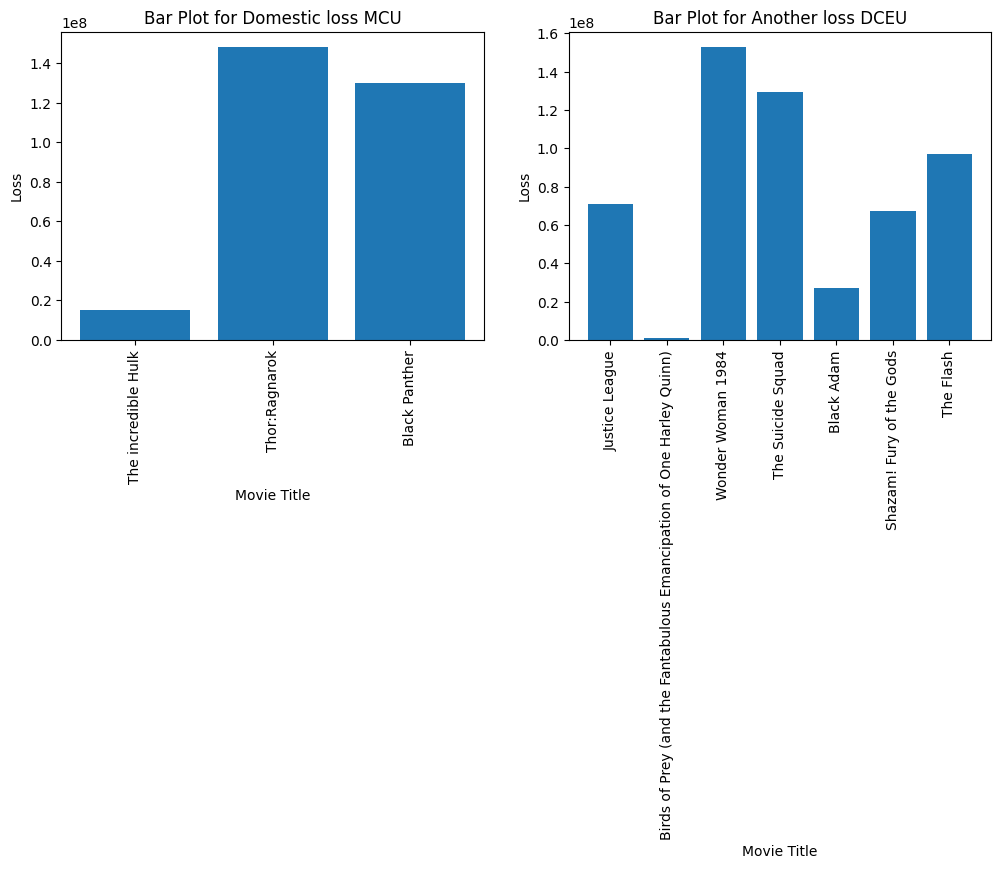

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))  


plt.subplot(1, 2, 1)  
pdf = mu.toPandas()
pdf2 = dc.toPandas()
plt.bar(pdf["Movie Title"], pdf["Domestic profit"] * -1)
plt.xlabel("Movie Title")
plt.ylabel("Loss")
plt.title("Bar Plot for Domestic loss MCU")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2) 

plt.bar(pdf2["Movie Title"], pdf2["Domestic profit"]*-1)
plt.xlabel("Movie Title")
plt.ylabel("Loss")
plt.title("Bar Plot for Another loss DCEU")
plt.xticks(rotation=90)
# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Show the combined plot
plt.show()


It seems Marvel is 1-0 in our contest. Let's now find out which movies had the best ratings. We have 2 ratings but IMBD is the most objective.

In [38]:
mcu.select('Movie Title','IMDB rating','metascore').orderBy('IMDB rating', ascending = False).show(7)

+--------------------+-----------+---------+
|         Movie Title|IMDB rating|metascore|
+--------------------+-----------+---------+
|Avengers: Infinit...|        8.4|       68|
|    Avengers:Endgame|        8.4|       78|
|Marvel's the Aven...|        8.0|       69|
|Guardians Of the ...|        8.0|       76|
|            Iron Man|        7.9|       79|
|       Thor:Ragnarok|        7.9|       74|
|Captain America: ...|        7.8|       75|
+--------------------+-----------+---------+
only showing top 7 rows



In [39]:
dceu.select('Movie Title','IMDB rating','metascore').orderBy('IMDB rating', ascending = False).show(7)

+--------------------+-----------+---------+
|         Movie Title|IMDB rating|metascore|
+--------------------+-----------+---------+
|        Wonder Woman|        7.4|       76|
|   The Suicide Squad|        7.2|       72|
|           The Flash|        7.2|       56|
|        Man of Steel|        7.1|       55|
|             Shazam!|        7.0|       71|
|             Aquaman|        6.8|       55|
|Batman v Superman...|        6.4|       44|
+--------------------+-----------+---------+
only showing top 7 rows



Another Clear Win for Marvel. 2-0. The highest ranked DCEU movie has a score of 7.2, it's not even among the MCU results.

We will complete our analysis by joining both dataframes and sorting them by category

In [55]:
mceu = mcu.select('Movie Title','Released Date','Duration (mins)','Budget','Domestic Gross','Total Gross','IMDB rating','metascore','Studio')
dcue = dceu.select('Movie Title','Released Date','Duration (mins)','Budget','Domestic Gross','Total Gross','IMDB rating','metascore','Studio')

In [58]:
hero = mceu.union(dcue)
hero.show(30)

+--------------------+-------------------+---------------+------+--------------+-----------+-----------+---------+---------+
|         Movie Title|      Released Date|Duration (mins)|Budget|Domestic Gross|Total Gross|IMDB rating|metascore|   Studio|
+--------------------+-------------------+---------------+------+--------------+-----------+-----------+---------+---------+
|            Iron Man|2008-05-02 00:00:00|            126| 1.4E8|   3.1860413E8| 5.853663E8|        7.9|       79|   Marvel|
| The incredible Hulk|2008-06-13 00:00:00|            112| 1.5E8|   1.3480691E8|2.6477099E8|        6.6|       61|   Marvel|
|          Iron Man 2|2010-05-07 00:00:00|            124| 2.0E8|   3.1243334E8| 6.239333E8|        7.0|       57|   Marvel|
|                Thor|2011-05-06 00:00:00|            115| 1.5E8|   1.8103062E8|4.4932662E8|        7.0|       57|   Marvel|
|Captain America: ...|2011-07-22 00:00:00|            124| 1.4E8|   1.7665451E8|3.7056976E8|        6.9|       66|   Marvel|


Which has the biggest total revenue combined. 

In [60]:
aggregated_hero = hero.groupBy('Studio').agg(
    sum('Total Gross').alias('Total Studio Gross'),
    avg('Total Gross').alias('Average Studio Gross')
)

aggregated_hero.show()

+---------+------------------+--------------------+
|   Studio|Total Studio Gross|Average Studio Gross|
+---------+------------------+--------------------+
|DC comics|     6.605509744E9|5.0811613415384614E8|
|   Marvel|   2.2586256272E10| 9.820111422608696E8|
+---------+------------------+--------------------+



Text(0.5, 1.0, 'Bar Plot for Whole revenue')

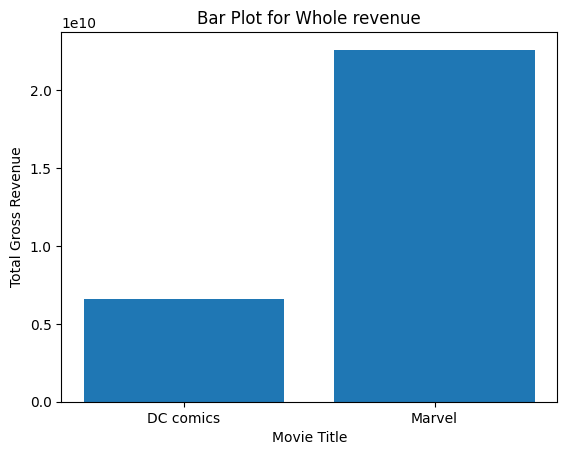

In [61]:
plthero = aggregated_hero.toPandas()
plt.bar(plthero["Studio"], plthero["Total Studio Gross"])
plt.xlabel("Movie Title")
plt.ylabel("Total Gross Revenue")
plt.title("Bar Plot for Whole revenue")

In [66]:
import seaborn as sns
h = hero.toPandas()
plt.figure(figsize=(10, 6))

# Create a line plot
sns.lineplot(x='Movie Title', y='IMDB ratings', data=h)

# Customize the plot
plt.xlabel("Movie Title")
plt.ylabel("Rating")
plt.title("Line Plot")

# Show the plot
plt.show()

TypeError: Casting to unit-less dtype 'datetime64' is not supported. Pass e.g. 'datetime64[ns]' instead.